### Домашнее задание 3
 
1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 

2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [55]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tqdm import tqdm
from operator import itemgetter, attrgetter, methodcaller

In [10]:
dataset = load_boston()
# Converting to Pandas DataFrame
data = pd.DataFrame(dataset['data'],columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
target = pd.Series(dataset['target'],name='price')
data = pd.concat([data,target],axis=1)
data.head()
# dropping unnecessary values
#removing unwanted columns
data.drop(['TAX','DIS'],axis=1,inplace=True)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['price'],axis=1),data['price'],test_size=0.15)
#converting to numpy 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
#normlizing the inputs
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
model = Sequential([
    Dense(x_train.shape[1], activation='relu', input_shape=(x_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='adam',
                     loss=tf.keras.losses.mse)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [30]:
bigger_history = model.fit( x_train, y_train,
  epochs=100,
  batch_size=128, validation_split=0.2, verbose = 0
)

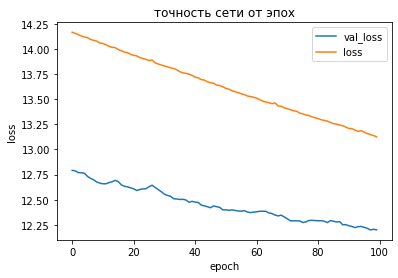

In [31]:
plt.plot(bigger_history.history['val_loss'] ,label='val_loss')
plt.plot(bigger_history.history['loss'] ,label='loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('точность сети от эпох')
plt.show()

Text(0, 0.5, 'predictions')

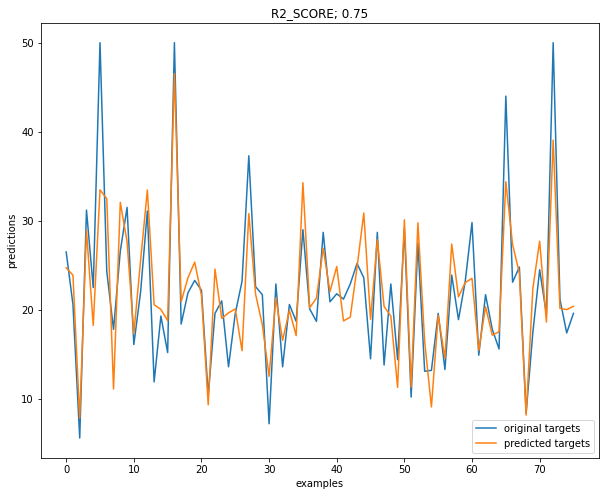

In [36]:
#predictions vs actual
r2 = round(r2_score(y_test, model.predict(x_test)),2)
y_pred = model.predict(x_test)
plt.figure(figsize=(10,8))
plt.plot(y_test,label="original targets")
plt.plot(y_pred,label="predicted targets")
plt.title(f'R2_SCORE; {r2}')
plt.legend()
plt.xlabel('examples')
plt.ylabel('predictions')

меняем число слоев, число нейронов , типы активации, тип оптимизатора

In [75]:
def make_nn(x_train, y_train, x_test, y_test, loss, metrics, n_layers, n_neurons, n_epochs, optimizer, verbose=0, plot = 0):
    # собираем сеть   
    inputs = Input(shape= x_train.shape[1])
    x = keras.layers.Flatten()(inputs)
    for i in range(n_layers):
        x = Dense(n_neurons, activation='relu', name='dense_'+str(i))(x)
    outputs = Dense(1, activation='relu' ,name='predictions')(x) 
    model = Model(inputs=inputs, outputs=outputs) 
    
    model.compile(optimizer=optimizer,
                     loss=loss,
                     metrics=metrics)
    
    bigger_history = model.fit( x_train, y_train,
                                epochs=n_epochs,
                                batch_size=128, 
                                validation_split=0.2, 
                                verbose=verbose) 
    #predictions vs actual
    r2 = round(r2_score(y_test, model.predict(x_test)),2)
    y_pred = model.predict(x_test)
    
    if plot >0:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        
        ax1.plot(bigger_history.history['val_loss'] ,label='val_loss')
        ax1.plot(bigger_history.history['loss'] ,label='loss')
        ax1.legend()
        ax1.set_xlabel('epoch')
        ax1.set_ylabel('loss')
        ax1.set_title('точность сети от эпох')
        


        ax2.plot(y_test,label="original targets")
        ax2.plot(y_pred,label="predicted targets")
        ax2.set_title(f'R2_SCORE; {r2}')
        ax2.legend()
        ax2.set_xlabel('examples')
        ax2.set_ylabel('predictions')
    
        plt.show()
        
    return r2

In [101]:
optim_list = ['Adam', 'SGD', 'RMSprop', 'Adagrad']
n_layers = [3,4,5,6,7,8,9,10]
n_neurons = [32, 64]
n_epochs = [100,150,200]
losses = [tf.keras.losses.mse,
#           tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
          tf.keras.losses.MAPE
         ]
metrics = ['Accuracy', 'MeanAbsoluteError', 'MeanSquaredLogarithmicError']

# make_nn(x_train, y_train, x_test, y_test, losses[0], metrics[0], 
#                            n_layers[1], n_neurons[1], n_epochs[1], optim_list[2], verbose=0, plot = 1)

error_list = []
for epc in tqdm(n_epochs):
    for nn in n_neurons:
         for ls in n_layers:
            for opt in optim_list:
                error_list.append([
                   epc,nn,ls,opt, loss, mtr,
                   make_nn(x_train, y_train, x_test, y_test, losses[0], metrics[0], ls, nn, epc, opt, verbose=0, plot = 0)
                ])

100%|██████████| 3/3 [15:33<00:00, 311.10s/it]


In [113]:
# 4 4 самых лучших результата
error_list = sorted(error_list, key=itemgetter(6), reverse=True) 
print(error_list[0],"\n", error_list[1],"\n",error_list[2], "\n",error_list[3])

[200, 32, 7, 'Adam', <function mean_squared_error at 0x177237ee0>, 'Accuracy', 0.82] 
 [200, 64, 3, 'RMSprop', <function mean_squared_error at 0x177237ee0>, 'Accuracy', 0.82] 
 [200, 64, 7, 'RMSprop', <function mean_squared_error at 0x177237ee0>, 'Accuracy', 0.82] 
 [150, 64, 10, 'Adam', <function mean_squared_error at 0x177237ee0>, 'Accuracy', 0.81]


Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [114]:
# выбираем функцию потерь и метрику для самых лучших 4х результатов
optim_list = ['Adam', 'RMSprop']
n_layers = [3,7,10]
n_neurons = [32, 64]
n_epoch = 200
loss = tf.keras.losses.mse
metrics = 'Accuracy'
error_final_list = []
for ls in tqdm(n_layers):
    for opt in optim_list: 
        for nn in n_neurons: 
            error_final_list.append([
               n_epoch,nn,ls,opt, loss, metrics,
               make_nn(x_train, y_train, x_test, y_test, loss, metrics, ls, nn, n_epoch, opt, verbose=0, plot = 0)
                ])

100%|██████████| 3/3 [01:28<00:00, 29.44s/it]


In [116]:
error_final_list = sorted(error_final_list, key=itemgetter(6), reverse=True) 

In [117]:
df = pd.DataFrame(error_final_list, columns=['Количество эпох', 'КОличество нейронов в слое',
                                             'Количество слоев', 'Опимизатор', 'Функция потерь', 'Метрика', 'R2'])

In [118]:
df

,Количество эпох,КОличество нейронов в слое,Количество слоев,Опимизатор,Функция потерь,Метрика,R2
0,200,32,7,RMSprop,<function mean_squared_error at 0x177237ee0>,Accuracy,0.81
1,200,32,7,Adam,<function mean_squared_error at 0x177237ee0>,Accuracy,0.79
2,200,64,3,Adam,<function mean_squared_error at 0x177237ee0>,Accuracy,0.78
3,200,64,7,Adam,<function mean_squared_error at 0x177237ee0>,Accuracy,0.78
4,200,64,7,RMSprop,<function mean_squared_error at 0x177237ee0>,Accuracy,0.78
5,200,64,10,Adam,<function mean_squared_error at 0x177237ee0>,Accuracy,0.78
6,200,32,3,Adam,<function mean_squared_error at 0x177237ee0>,Accuracy,0.77
7,200,64,3,RMSprop,<function mean_squared_error at 0x177237ee0>,Accuracy,0.77
8,200,32,10,Adam,<function mean_squared_error at 0x177237ee0>,Accuracy,0.77
9,200,32,3,RMSprop,<function mean_squared_error at 0x177237ee0>,Accuracy,0.75


#### Вывод:
- количетво эпох чем больше тем лучше для точности, опимально 200
- количество нейронов не должно быть слишком большое, оптимально 32
- оптимальное количество слоев для этого датасета равно 7
- функция потерь mse, так как мы предсказываем непрерывную величину
- лучшая метрика Accuracy